In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import inferagni as ia

/home/harrison/miniforge3/envs/proteus/lib/python3.12/site-packages/astropy/config/paths.py:55: AstropyUserWarning: XDG_CONFIG_HOME is set to '/home/harrison/.var/app/com.visualstudio.code/config', but the default location, /home/harrison/.astropy/config, already exists, and takes precedence. This environment variable will be ignored.
  return set_temp_config._get_dir_path(rootname)


In [4]:
datadir = "../src/inferagni/data/"

gr = ia.grid.Grid(datadir)

Loading data from disk...
    Source: /home/harrison/Projects/InferAGNI/src/inferagni/data
Loading grid of scalar quantities
    Grid size: 264600 points
    Input vars:
      Teff              : range [2500.0, 5750.0]
      instellation      : range [1.0, 1000.0]
      logZ              : range [-2.0, 1.0]
      logCO             : range [-3.0, 0.0]
      mass_tot          : range [1.0, 10.0]
      frac_core         : range [0.2, 0.7]
      frac_atm          : range [0.001, 0.25]
    Output vars: 
      succ, flux_loss, r_bound, p_surf,
      t_surf, r_surf, μ_surf, g_surf, t_phot,
      r_phot, μ_phot, g_phot, vmr_H2,
      vmr_H2O, vmr_CO2, vmr_CO, vmr_O2,
      vmr_OH, vmr_NH3, vmr_NO2, vmr_N2,
      vmr_SO2, vmr_H2S, vmr_H2SO4, Kzz_max,
      conv_ptop, conv_pbot
Loading emission spectra
    done
Loading atmosphere profiles
    done
--------------------------------------------------



In [5]:
gr.show_inputs()

Teff              
	- [2500. 3150. 3800. 4450. 5100. 5750.]
instellation      
	- [   1.   10.  100.  300. 1000.]
logZ              
	- [-2.  -1.5 -1.  -0.5  0.   0.5  1. ]
logCO             
	- [-3. -2. -1.  0.]
mass_tot          
	- [ 1.     1.24   1.537  1.905  2.362  2.928  3.63   4.5    5.044  5.653
  6.336  7.102  7.96   8.922 10.   ]
frac_core         
	- [0.2   0.325 0.7  ]
frac_atm          
	- [0.001   0.00251 0.0063  0.0158  0.0397  0.0996  0.25   ]


In [6]:
print(gr.get_points())

[array([2500., 3150., 3800., 4450., 5100., 5750.]), array([1000.,  300.,  100.,   10.,    1.]), array([ 1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ]), array([-3., -2., -1.,  0.]), array([10.   ,  8.922,  7.96 ,  7.102,  6.336,  5.653,  5.044,  4.5  ,
        3.63 ,  2.928,  2.362,  1.905,  1.537,  1.24 ,  1.   ]), array([0.2  , 0.325, 0.7  ]), array([0.001  , 0.00251, 0.0063 , 0.0158 , 0.0397 , 0.0996 , 0.25   ])]


Plot mass-radius 2D plane
    Zkey 1 (colour): instellation
    Zkey 2 (alpha):  frac_atm
    Control variables
      Filter by logZ         = 0.5
      Filter by logCO        = -1
      Filter by frac_core    = 0.325
      Filter by Teff         = 4450
    Number of grid points: 500
    Too few control variables to show isolines; showing scatter points
    Colorbar shows 'instellation': vmin 1.0 - vmax 1000.0
    Saving plot to 'massrad2d.pdf'
    Showing plot GUI


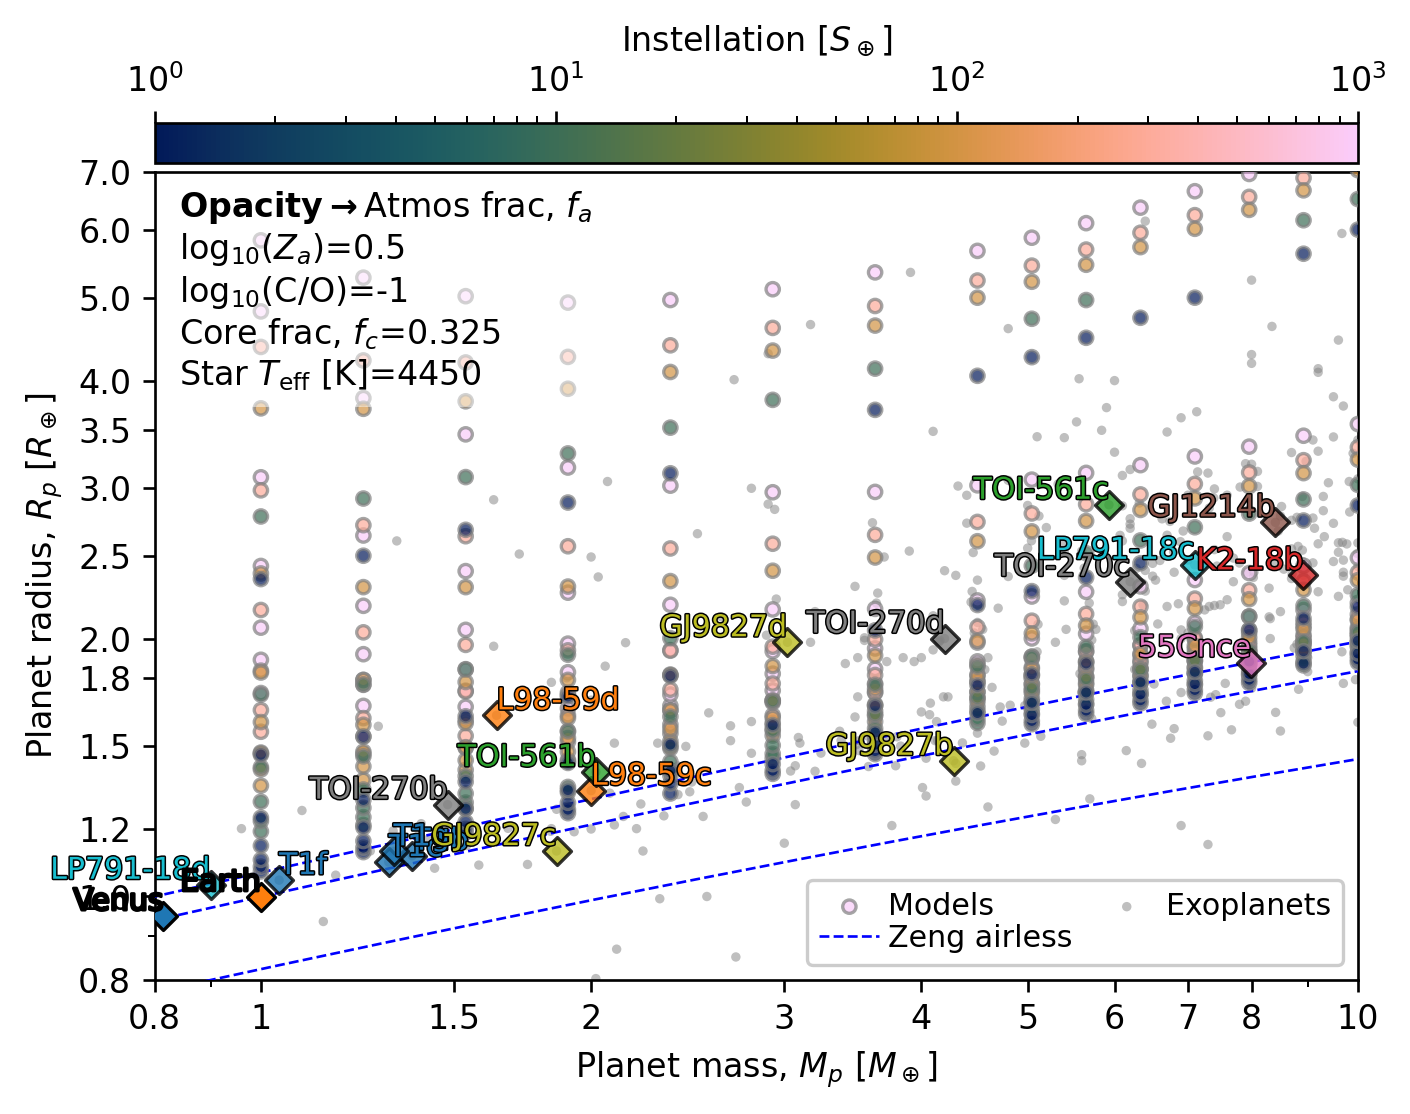

In [7]:
opts = {
    "key1"    : "instellation",
    "key2"    : "frac_atm",
    "controls": {"logZ":0.5, "logCO":-1,  "frac_core":0.325, "Teff":4450},
    "show_scatter" : True,
    "show_isolines" : True,
}

fig = ia.plot.massrad_2d(gr, **opts)
plt.show(fig)

Filter by frac_atm = 0.0063
Filter by frac_core = 0.325
Filter by logZ = 0
Filter by Teff = 4450
Filter by logCO = -1
Number of points: 74
x range: 1.00 - 10.00
y range: 1.29 - 6.12


/tmp/ipykernel_15434/384511466.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  fig.colorbar(sm, label=ia.util.varprops[zkey].label).ax.set_yscale("log")


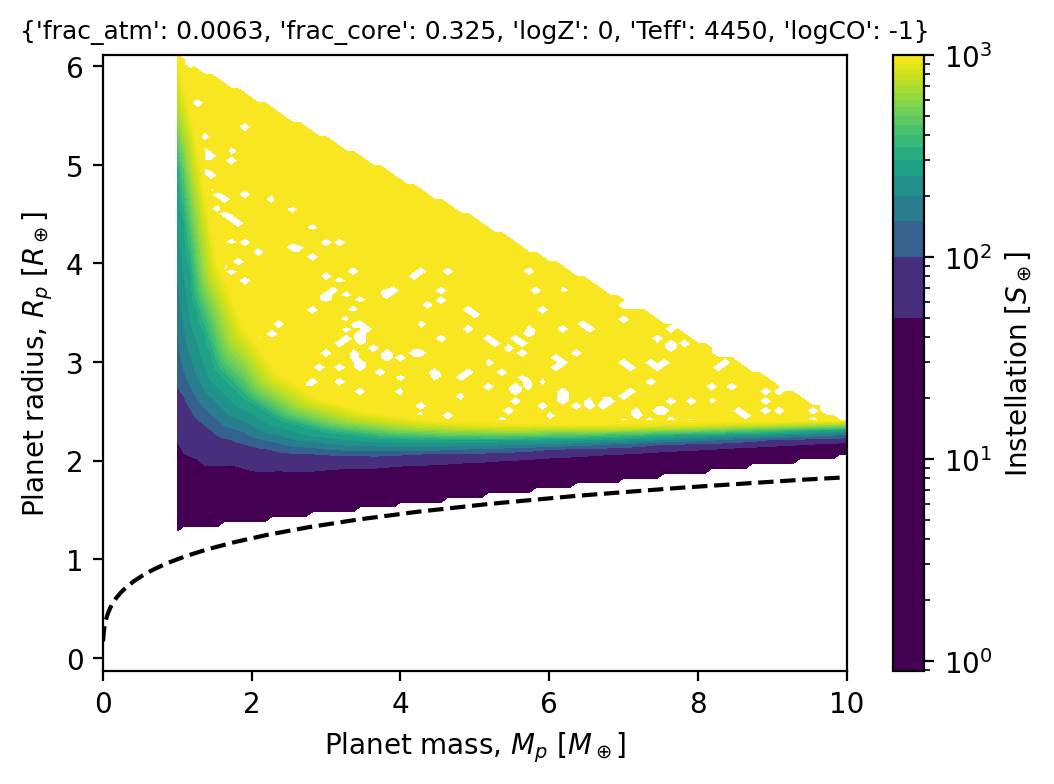

Filter by frac_core = 0.325
Filter by logZ = 0.0
Filter by instellation = 10.0
Filter by Teff = 4450
Filter by logCO = -1
Number of points: 97
x range: 1.00 - 10.00
y range: 1.49 - 12.65


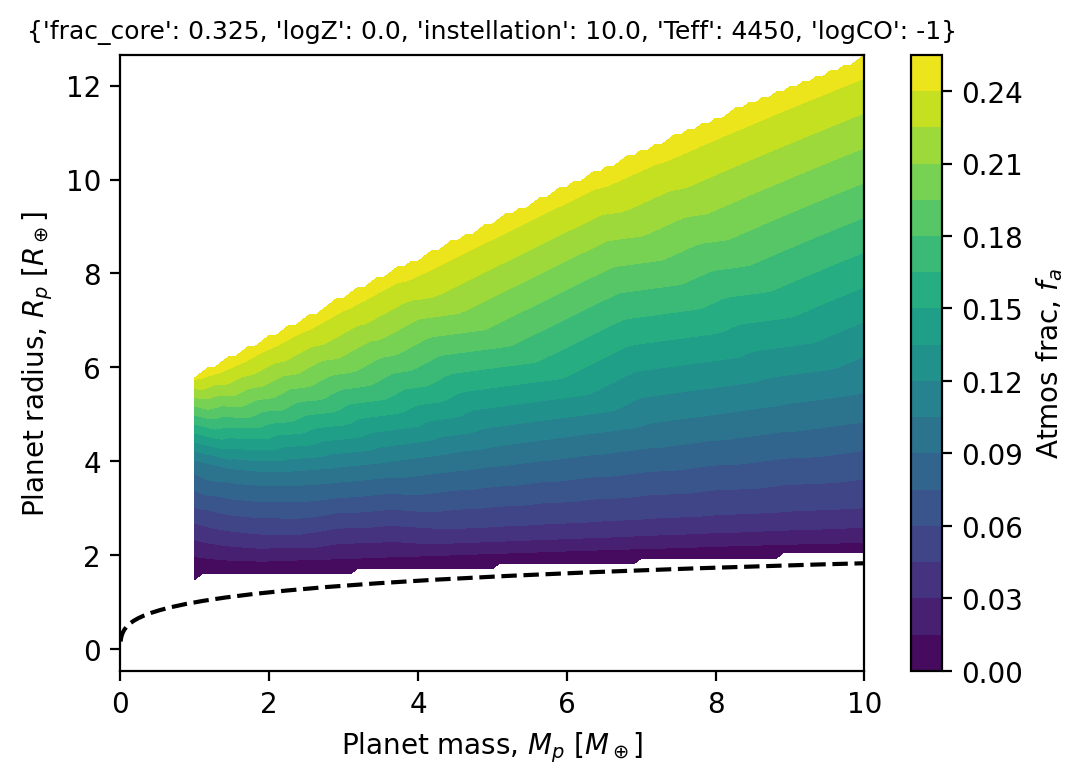

In [8]:
zkey = "instellation"
controls =  {"frac_atm":0.0063, "frac_core":0.325, "logZ":0, "Teff":4450, "logCO":-1}
itp_x, itp_y, itp_z = gr.interp_2d(controls=controls,
                                     zkey=zkey,
                                     resolution=100, method='linear')

fig,ax = plt.subplots(1,1,figsize=(6,4))
sm = ax.contourf(itp_x, itp_y, itp_z, levels=20, cmap='viridis', norm='log')
ax.plot(ia.plot.zeng[0.325][0],ia.plot.zeng[0.325][1], c='k', ls='--', label="Zeng+2019")
ax.set(xlabel=ia.util.varprops["mass_tot"].label, ylabel=ia.util.varprops["r_phot"].label, xlim=(0,10))
ax.set_title(f"{controls}", fontsize=9)
fig.colorbar(sm, label=ia.util.varprops[zkey].label).ax.set_yscale("log")
plt.show(fig)


zkey = "frac_atm"
controls={"frac_core":0.325, "logZ":0.0, "instellation":10.0, "Teff":4450, "logCO":-1}
itp_x, itp_y, itp_z = gr.interp_2d(controls=controls,
                                     zkey=zkey,
                                     resolution=100, method='linear')

fig,ax = plt.subplots(1,1,figsize=(6,4))
sm = ax.contourf(itp_x, itp_y, itp_z, levels=20, cmap='viridis')
ax.plot(ia.plot.zeng[0.325][0],ia.plot.zeng[0.325][1], c='k', ls='--', label="Zeng+2019")
ax.set(xlabel=ia.util.varprops["mass_tot"].label, ylabel=ia.util.varprops["r_phot"].label, xlim=(0,10))
ax.set_title(f"{controls}", fontsize=9)
fig.colorbar(sm, label=ia.util.varprops[zkey].label)
plt.show(fig)

In [9]:
vkey = "r_phot"
gr.interp_init(vkey=vkey)

Creating interpolator on r_phot
    Organising data
    Creating interpolator
    Interpolator ready


### Test across masses, and different methods

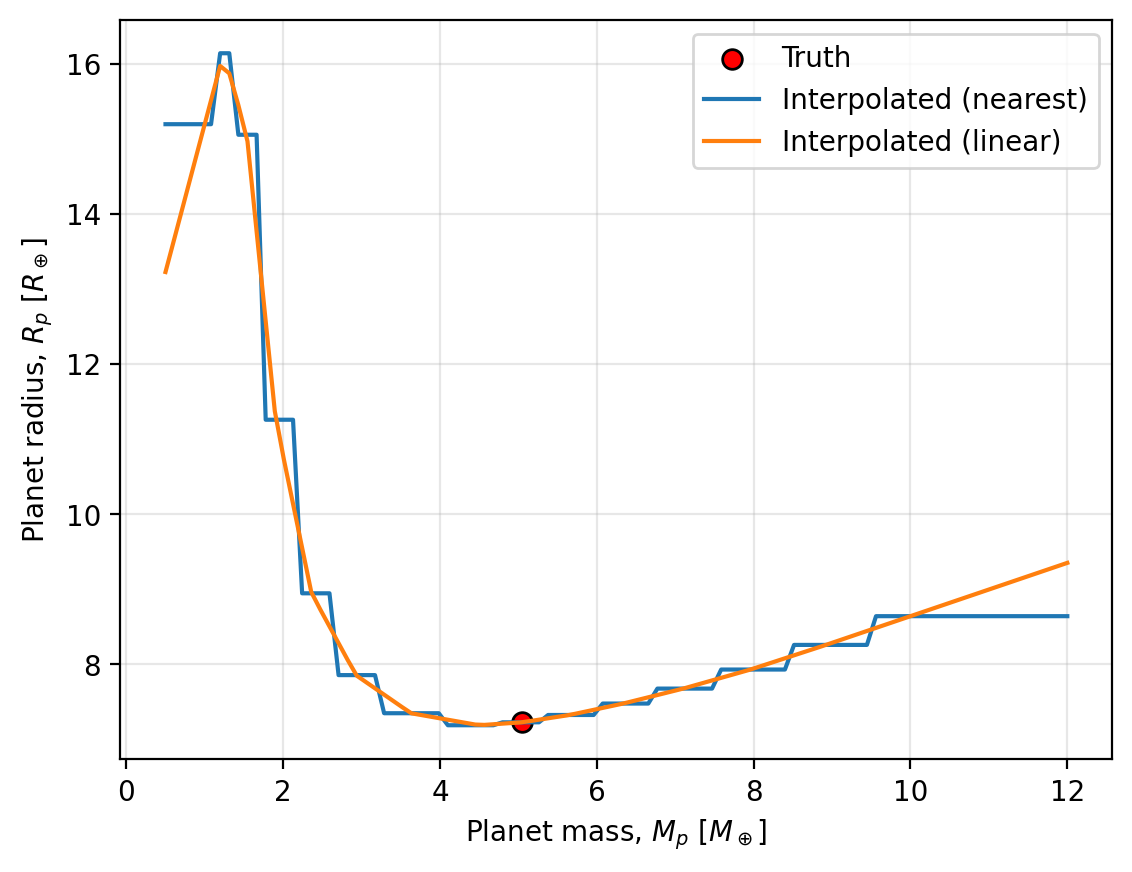

In [10]:

fig,ax = plt.subplots(1,1)

idx = 100_000
eval_loc = {k: gr.data[k].values[idx] for k in gr.input_keys}

val_tru = ia.util.undimen(gr.data[vkey].values[idx],vkey)
ax.scatter(eval_loc["mass_tot"], val_tru, s=50, c='r', label="Truth", edgecolors='k')

for method in ("nearest","linear",):

    mass_arr = np.linspace(0.5, 12, 100)
    val_est = []
    for mass in mass_arr:
        eval_loc["mass_tot"] = mass
        val_est.append(gr.interp_eval(eval_loc, method=method, vkey=vkey))

    ax.plot(mass_arr, val_est, label=f"Interpolated ({method})")

ax.set(xlabel=ia.util.varprops["mass_tot"].label, ylabel=ia.util.varprops[vkey].label)
ax.legend()
ax.grid(zorder=-2, alpha=0.3)

plt.show()

### Test across masses, and other dimension

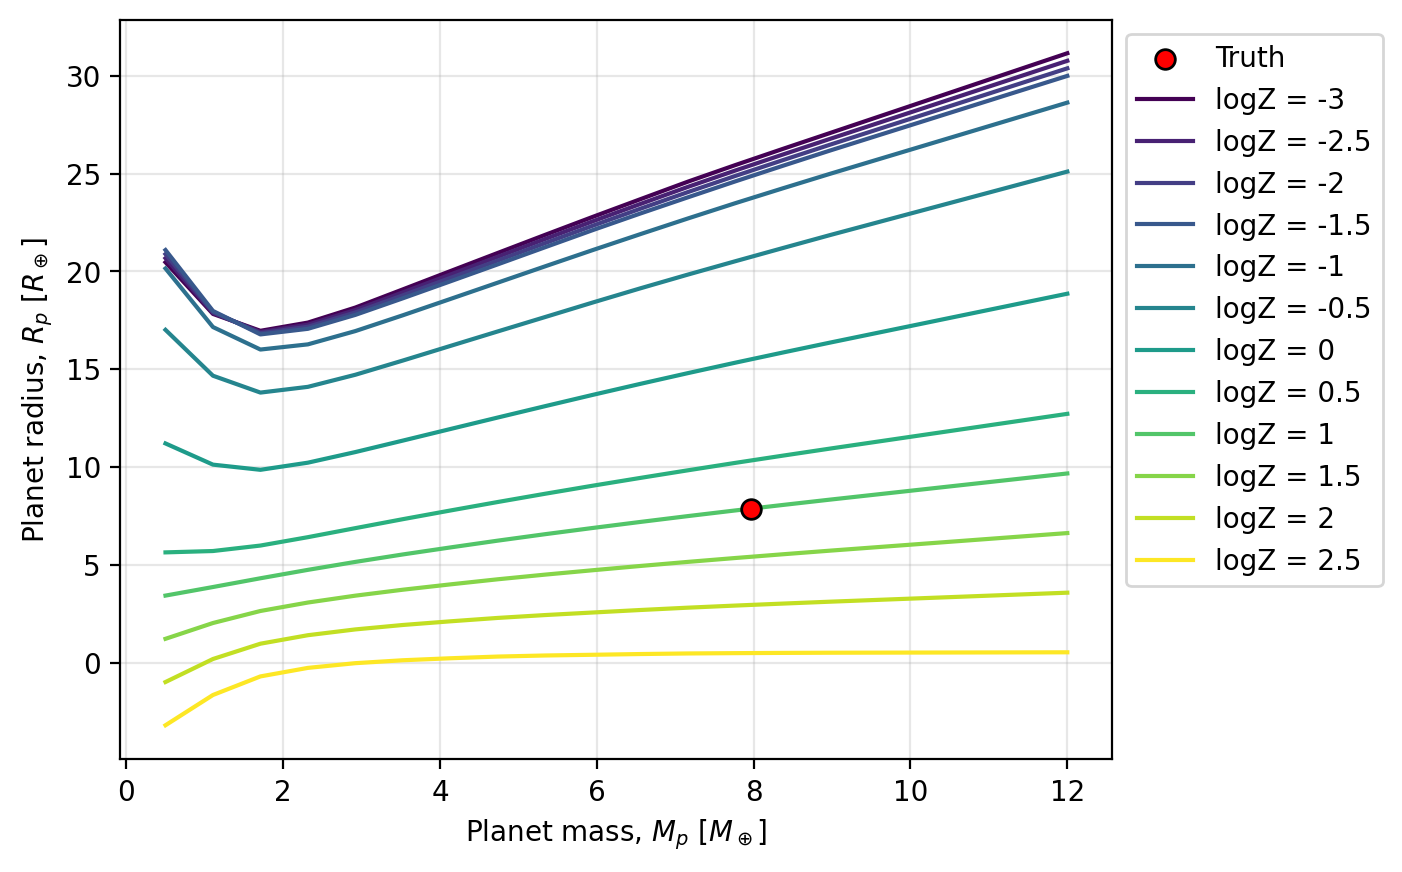

In [11]:

fig,ax = plt.subplots(1,1)

idx = 1000
eval_loc = {k: gr.data[k].values[idx] for k in gr.input_keys}

val_tru = ia.util.undimen(gr.data[vkey].values[idx], vkey)
ax.scatter(eval_loc["mass_tot"], val_tru, s=50, c='r', label="Truth", edgecolors='k', zorder=20)

z_key = "logZ"; z_arr = np.arange(-3, 3, 0.5)
norm = mpl.colors.Normalize(vmin=np.amin(z_arr), vmax=np.amax(z_arr), clip=True)
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')

for z in z_arr:

    mass_arr = np.linspace(0.5, 12, 20)
    val_est = []
    for mass in mass_arr:
        eval_loc["mass_tot"] = mass
        eval_loc[z_key] = z
        val_est.append(gr.interp_eval(eval_loc,vkey=vkey))

    ax.plot(mass_arr, val_est, label=f"{z_key} = {z:g}", c=sm.to_rgba(z), zorder=10)

ax.set(xlabel=ia.util.varprops["mass_tot"].label, ylabel=ia.util.varprops[vkey].label)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.grid(zorder=-2, alpha=0.3)

plt.show()